<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal-of-the-challenge" data-toc-modified-id="Goal-of-the-challenge-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal of the challenge</a></span></li><li><span><a href="#Dataset" data-toc-modified-id="Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dataset</a></span></li><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data cleaning</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#KNN-Regression" data-toc-modified-id="KNN-Regression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>KNN Regression</a></span></li><li><span><a href="#OLS" data-toc-modified-id="OLS-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>OLS</a></span></li></ul></li></ul></div>

# Goal of the challenge
Compare KNN Regression and OLS regression.



# Dataset

The dataset is taken from Kaggle competition -- House Prices: Advanced Regression Techniques.

The outcome is the sale price for the property.


# Data cleaning


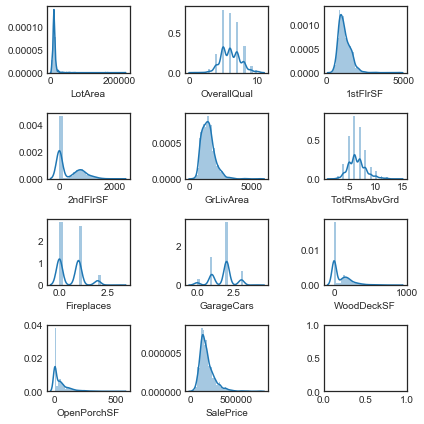

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import neighbors
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
%matplotlib inline

sns.set_style('white')

df = pd.read_csv('train.csv')

#Make a subtable for analysis
df1 = df[['LotArea', 'OverallQual', '1stFlrSF', '2ndFlrSF',
'GrLivArea', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'WoodDeckSF',
'OpenPorchSF', 'SalePrice']]

#There are not a lot of missing values. We can drop them.
df1.isnull().sum()
df1 = df1.dropna()

#Visually check distribution
f, axes = plt.subplots(4, 3, figsize=(6, 6))
sns.distplot(df['LotArea'], ax=axes[0, 0])
sns.distplot(df['OverallQual'], ax=axes[0, 1])
sns.distplot(df['1stFlrSF'], ax=axes[0, 2])
sns.distplot(df['2ndFlrSF'], ax=axes[1, 0])
sns.distplot(df['GrLivArea'], ax=axes[1, 1])
sns.distplot(df['TotRmsAbvGrd'], ax=axes[1, 2])
sns.distplot(df['Fireplaces'], ax=axes[2, 0])
sns.distplot(df['GarageCars'], ax=axes[2, 1])
sns.distplot(df['WoodDeckSF'], ax=axes[2, 2])
sns.distplot(df['OpenPorchSF'], ax=axes[3, 0])
sns.distplot(df['SalePrice'], ax=axes[3, 1])
plt.tight_layout()
plt.show()


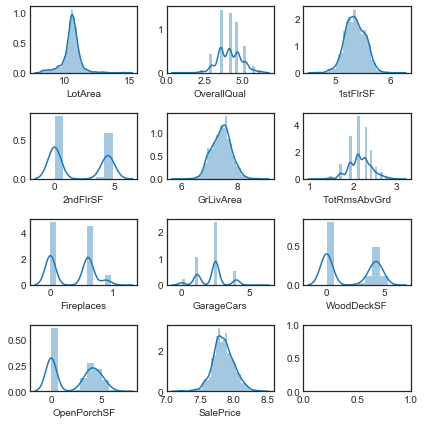

In [2]:
#Boxcox transformation for all
def boxcox_trans(s):
    return stats.boxcox(s+1)[0]

df_bc = pd.DataFrame()
df_bc = df1.apply(boxcox_trans, axis=0)

#Check the distribution again
f, axes = plt.subplots(4, 3, figsize=(6, 6))
sns.distplot(df_bc['LotArea'], ax=axes[0, 0])
sns.distplot(df_bc['OverallQual'], ax=axes[0, 1])
sns.distplot(df_bc['1stFlrSF'], ax=axes[0, 2])
sns.distplot(df_bc['2ndFlrSF'], ax=axes[1, 0])
sns.distplot(df_bc['GrLivArea'], ax=axes[1, 1])
sns.distplot(df_bc['TotRmsAbvGrd'], ax=axes[1, 2])
sns.distplot(df_bc['Fireplaces'], ax=axes[2, 0])
sns.distplot(df_bc['GarageCars'], ax=axes[2, 1])
sns.distplot(df_bc['WoodDeckSF'], ax=axes[2, 2])
sns.distplot(df_bc['OpenPorchSF'], ax=axes[3, 0])
sns.distplot(df_bc['SalePrice'], ax=axes[3, 1])
plt.tight_layout()
plt.show()

In [4]:
#Correlation matrix of the transformed data.
corrmax = df_bc.corr()
print('Correlation matrix of boxcox-tranformed data:\n', corrmax)

Correlation matrix of boxcox-tranformed data:
                LotArea  OverallQual  1stFlrSF  2ndFlrSF  GrLivArea  \
LotArea       1.000000     0.175352  0.467587 -0.016912   0.386322   
OverallQual   0.175352     1.000000  0.448602  0.193602   0.613478   
1stFlrSF      0.467587     0.448602  1.000000 -0.357435   0.544443   
2ndFlrSF     -0.016912     0.193602 -0.357435  1.000000   0.548603   
GrLivArea     0.386322     0.613478  0.544443  0.548603   1.000000   
TotRmsAbvGrd  0.366886     0.432614  0.412576  0.494582   0.829971   
Fireplaces    0.310325     0.426067  0.401808  0.138041   0.481706   
GarageCars    0.273832     0.602218  0.453561  0.066233   0.501675   
WoodDeckSF    0.118905     0.280861  0.195620  0.036358   0.215702   
OpenPorchSF   0.138115     0.442828  0.243163  0.162995   0.395053   
SalePrice     0.398997     0.813658  0.606967  0.170097   0.729386   

              TotRmsAbvGrd  Fireplaces  GarageCars  WoodDeckSF  OpenPorchSF  \
LotArea           0.366886    0.3

# Modeling

## KNN Regression


In [7]:
#KNN
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = df_bc.drop(columns='SalePrice')
Y = df_bc['SalePrice']
knn_w.fit(X, Y)

#Cross validation
score_knn = cross_val_score(knn_w, X, Y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (score_knn.mean(), score_knn.std() * 2))
print('Cross validation scores: ', score_knn)

Accuracy: 0.75 (+/- 0.02)
Cross validation scores:  [0.75784786 0.73769126 0.74962557 0.75527201 0.76330696]


## OLS

In [8]:
#Linear regression
regr = linear_model.LinearRegression()
regr.fit(X, Y)

#Cross validation
score_regr = cross_val_score(regr, X, Y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (score_regr.mean(), score_regr.std() * 2))
print('Cross validation scores: ', score_regr)

Accuracy: 0.82 (+/- 0.02)
Cross validation scores:  [0.82959718 0.83086969 0.81447985 0.82109741 0.80380873]
